# Guía teórico-práctica del Análisis de Sonda Langmuir en el SCR-1

## Por Julián Sánchez Castro

### Resumen:
El presente documento tiene como fin recopilar la información pertinente al análisis teórico y experimental de la sonda Langmuir en el SCR-1 del Laboratorio de Plasmas para Energía de Fusión y Aplicaciones (Laboratorio de Plasmas). El enfoque es más práctico, por lo que no se ahondará a profundidad en la derivación teoríca de todas las relaciones entre parámetros del plasma, sin embargo se intentará brindar suficiente información para hacer del uso y comprensión del código fácilmente.

Este documento surge del desarrollo del proyecto "Simulación del campo magnético del stellarator SCR-1 para el cálculo de la velocidad radial y visualización del mapa vectorial de campo en flujo turbulento" financiado por el programa Becas CeNAT-CONARE, en colaboración entre el Laboratorio de Plasmas y el Colaboratorio Nacional de Computación Avanzada (CNCA).

En caso de presentar dudas sobre alguna parte del documento, por favor consultar conmigo al correo jsanchezitcr@proton.me.  


# Análisis de Resultados

Para el estudio del comportamiento de la densidad y temperatura electrónica en el plasma se realizó un barrido en posición con la sonda, tomando tres mediciones en siete posiciones dentro del plasma, desde el centro hasta la periferia. Las posiciones en el flujo se decidieron teóricamente según el gráfico de posiciones aportado por el profesor investigador Ricardo Solano, y se convirtieron a la posición correspondiente en la regla de la sonda, que debido a la resolución tuvo que redondearse a la división más cercana, y luego recalcular la posición en el flujo. A continuación se muestran estas posiciones en flujo y en regla:

<div align="center">

Número de posición | Posición en flujo [m] | Posición en regla [mm] | Posición en regla real [mm] | Posición en flujo real [m] |
-------------------|------------------------|------------------------|-----------------------------|---------------------------|
1                  | 0.31                   | 339.3654545            | 339                         | 0.309666168               |
2                  | 0.298                  | 326.2287273            | 326                         | 0.297791065               |
3                  | 0.289                  | 316.3761818            | 316                         | 0.288656369               |
4                  | 0.279                  | 305.4289091            | 305                         | 0.278608205               |
5                  | 0.27                   | 295.5763636            | 296                         | 0.270386979               |
6                  | 0.263                  | 287.9132727            | 288                         | 0.263079223               |
7                  | 0.254                  | 278.0607273            | 278                         | 0.253944527               |

<br>

<img src="posiciones_en_flujo.png" alt="Figura de posiciones en flujo" width="600">

</div>

Con esto definido, se procede al cálculo de las temperaturas y densidades de las posiciones:



In [1]:
import importlib
import numpy as np
import matplotlib.pyplot as plt

import calculos as calc
importlib.reload(calc)
import fileio
importlib.reload(fileio)
import graf
importlib.reload(graf)

<module 'graf' from 'c:\\Users\\pelot\\OneDrive\\Documentos\\TEC\\Teoria_de_Plasmas\\repositorio\\sonda-de-langmuir\\Sonda_Lagmuir_Julian\\graf.py'>

### ¡Nota importante!

Debido a la programación de operación de la sonda Langmuir, los archivos se exportan en formato .xlsx (Excel), que por naturaleza están protegidos ante apertura, por lo que es necesario abrir primero cada archivo, confirmar que es seguro leerlo/editarlo y luego guardarlo. Si no se hace esto, se van a encontrar problemas para ejecutar el PreProcesado.

### Parámetros de ejecución (en orden de aparición):

`tol_vf` Es la tolerancia con la que distingue cuando un valor se encuentra cercano a cero.

`show_graf` Mostrar los gráficos de curvas (True o False)

`freq_datos` Viene dada desde las mediciones, y se tomó fija para todas las descargas.

`dif` Se refiere a la diferencia de corriente entre dos puntos consecutivos para separar las curvas. Es independiente entre archivos dado que cada descarga tendrá amplitudes diferentes. Para más información del funcionamiento del PreProcesado revisar el archivo `fileio.py`.




In [2]:
TeV_prom = []
Ies_prom = []
ne_prom  = []
posiciones = [0.31,0.298,0.289,0.279,0.27,0.263,0.254]

In [3]:
# Posición 1: 0.31 m

archivos = ["PruebasSondaSimple_158.xlsx","PruebasSondaSimple_164.xlsx","PruebasSondaSimple_165.xlsx"]
tol_vf = 0.01
show_graf = False
freq_datos = 40
TeV_proms = []
Ies_proms = []
ne_proms  = []

# Archivo 166

dif = 0.0013
df_158, segmentos_df_158 = fileio.PreProcesado("PruebasSondaSimple_158.xlsx", dif, freq_datos,-80,80)
lista_vf_158 = calc.Calc_Vf(segmentos_df_158,tol_vf,short=True)
print("vf_158:",lista_vf_158)
lista_vp_sd_158 = calc.Calc_Vp_SD(segmentos_df_158,short=True)
print("vp_158:",lista_vp_sd_158)
lista_TeV_158,lista_Ies_158,lista_ne_158,lista_r2_158 = calc.Calc_TeV_Ies_ne(segmentos_df_158, lista_vf_158, lista_vp_sd_158,short=True)
print("TeV_158:",lista_TeV_158)
TeV_proms.append(np.average(lista_TeV_158))
print("Ies_158:",lista_Ies_158)
Ies_proms.append(np.average(lista_Ies_158))
print("ne_158:",lista_ne_158)
ne_proms.append(np.average(lista_ne_158))
if show_graf == True:
    graf.GrafDatos(df_158, segmentos_df_158, 'Tiempo', 'Corriente', 'Voltaje', 'Corriente', freq_datos,158)
print("\n")

# Archivo 164

freq_datos = 40
dif = 0.002
df_164, segmentos_df_164 = fileio.PreProcesado("PruebasSondaSimple_164.xlsx", dif, freq_datos,-80,80)
lista_vf_164 = calc.Calc_Vf(segmentos_df_164,tol_vf,short=True)
print("vf_164:",lista_vf_164)
lista_vp_sd_164 = calc.Calc_Vp_SD(segmentos_df_164,short=True)
print("vp_164:",lista_vp_sd_164)
lista_TeV_164,lista_Ies_164,lista_ne_164,lista_r2_164 = calc.Calc_TeV_Ies_ne(segmentos_df_164, lista_vf_164, lista_vp_sd_164,short=True)
print("TeV_164:",lista_TeV_164)
TeV_proms.append(np.average(lista_TeV_164))
print("Ies_164:",lista_Ies_164)
Ies_proms.append(np.average(lista_Ies_164))
print("ne_164:",lista_ne_164)
ne_proms.append(np.average(lista_ne_164))
if show_graf == True:
    graf.GrafDatos(df_164, segmentos_df_164, 'Tiempo', 'Corriente', 'Voltaje', 'Corriente', freq_datos,164)
print("\n")

# Archivo 165

freq_datos = 40
dif = 0.002
df_165, segmentos_df_165 = fileio.PreProcesado("PruebasSondaSimple_165.xlsx", dif, freq_datos,-80,80)
lista_vf_165 = calc.Calc_Vf(segmentos_df_165,tol_vf,short=True)
print("vf_165:",lista_vf_165)
lista_vp_sd_165 = calc.Calc_Vp_SD(segmentos_df_165,short=True)
print("vp_165:",lista_vp_sd_165)
lista_TeV_165,lista_Ies_165,lista_ne_165,lista_r2_165 = calc.Calc_TeV_Ies_ne(segmentos_df_165, lista_vf_165, lista_vp_sd_165,short=True)
print("TeV_165:",lista_TeV_165)
TeV_proms.append(np.average(lista_TeV_165))
print("Ies_165:",lista_Ies_165)
Ies_proms.append(np.average(lista_Ies_165))
print("ne_165:",lista_ne_165)
ne_proms.append(np.average(lista_ne_165))
if show_graf == True:
    graf.GrafDatos(df_165, segmentos_df_165, 'Tiempo', 'Corriente', 'Voltaje', 'Corriente', freq_datos,165)
print("\n")

# Promediado de valores de temperatura y densidad
TeV_prom_pos1 = np.average(TeV_proms)
TeV_prom.append(TeV_prom_pos1)
print("TeV promedio para la posición 1:",TeV_prom_pos1)
Ies_prom_pos1 = np.average(Ies_proms)
Ies_prom.append(Ies_prom_pos1)
print("Ies promedio para la posición 1:",Ies_prom_pos1)
ne_prom_pos1 = np.average(ne_proms)
ne_prom.append(ne_prom_pos1)
print("ne promedio para la posición 1:",ne_prom_pos1)


vf_158: [-2.50546, -2.50546]
vp_158: [22.494532, 52.494546]
TeV_158: [7.988746725884852, 19.188599560003222]
Ies_158: [0.0011225594405594435, 0.001573720279720284]
ne_158: [1451337123734469.2, 1312816980436081.0]


vf_164: [3.330651, -3.336007, 3.330644, -3.336014]
vp_164: [69.997326, 29.997317, 23.330655, 23.330652]
TeV_164: [23.699777633288154, 10.652329885047802, 8.124710391408627, 8.395363612587825]
Ies_164: [0.0030857086247086324, 0.0014776153846153884, 0.001069256410256413, 0.0011503496503496532]
ne_164: [2316226695359159.5, 1654388050215899.0, 1370806647547948.8, 1450802827823361.5]


vf_165: [-3.343161, -3.343158, -3.343161]
vp_165: [23.323505, 23.323501, 23.323501]
TeV_165: [9.545952530650647, 9.32705319889127, 9.176868801776473]
Ies_165: [0.001406347319347323, 0.0012190303030303062, 0.0013335757575757613]
ne_165: [1663340792288409.0, 1458614607554651.2, 1608676488946869.8]


TeV promedio para la posición 1: 11.88555890021109
Ies promedio para la posición 1: 0.0014545078347578

In [4]:
# Posición 2: 0.298 m

archivos = ["PruebasSondaSimple_166.xlsx","PruebasSondaSimple_167.xlsx","PruebasSondaSimple_168.xlsx"]
tol_vf = 0.01
show_graf = False
freq_datos = 40
TeV_proms = []
Ies_proms = []
ne_proms  = []

# Archivo 166

dif = 0.0013
df_166, segmentos_df_166 = fileio.PreProcesado("PruebasSondaSimple_166.xlsx", dif, freq_datos,-80,80)
lista_vf_166 = calc.Calc_Vf(segmentos_df_166,tol_vf,short=True)
print("vf_166:",lista_vf_166)
lista_vp_sd_166 = calc.Calc_Vp_SD(segmentos_df_166,short=True)
print("vp_166:",lista_vp_sd_166)
lista_TeV_166,lista_Ies_166,lista_ne_166,lista_r2_166 = calc.Calc_TeV_Ies_ne(segmentos_df_166, lista_vf_166, lista_vp_sd_166,short=True)
print("TeV_166:",lista_TeV_166)
TeV_proms.append(np.average(lista_TeV_166))
print("Ies_166:",lista_Ies_166)
Ies_proms.append(np.average(lista_Ies_166))
print("ne_166:",lista_ne_166)
ne_proms.append(np.average(lista_ne_166))
if show_graf == True:
    graf.GrafDatos(df_166, segmentos_df_166, 'Tiempo', 'Corriente', 'Voltaje', 'Corriente', freq_datos,166)
print("\n")

# Archivo 167

freq_datos = 40
dif = 0.002
df_167, segmentos_df_167 = fileio.PreProcesado("PruebasSondaSimple_167.xlsx", dif, freq_datos,-80,80)
lista_vf_167 = calc.Calc_Vf(segmentos_df_167,tol_vf,short=True)
print("vf_167:",lista_vf_167)
lista_vp_sd_167 = calc.Calc_Vp_SD(segmentos_df_167,short=True)
print("vp_167:",lista_vp_sd_167)
lista_TeV_167,lista_Ies_167,lista_ne_167,lista_r2_167 = calc.Calc_TeV_Ies_ne(segmentos_df_167, lista_vf_167, lista_vp_sd_167,short=True)
print("TeV_167:",lista_TeV_167)
TeV_proms.append(np.average(lista_TeV_167))
print("Ies_167:",lista_Ies_167)
Ies_proms.append(np.average(lista_Ies_167))
print("ne_167:",lista_ne_167)
ne_proms.append(np.average(lista_ne_167))
if show_graf == True:
    graf.GrafDatos(df_167, segmentos_df_167, 'Tiempo', 'Corriente', 'Voltaje', 'Corriente', freq_datos,167)
print("\n")

# Archivo 168

freq_datos = 40
dif = 0.002
df_168, segmentos_df_168 = fileio.PreProcesado("PruebasSondaSimple_168.xlsx", dif, freq_datos,-80,80)
lista_vf_168 = calc.Calc_Vf(segmentos_df_168,tol_vf,short=True)
print("vf_168:",lista_vf_168)
lista_vp_sd_168 = calc.Calc_Vp_SD(segmentos_df_168,short=True)
print("vp_168:",lista_vp_sd_168)
lista_TeV_168,lista_Ies_168,lista_ne_168,lista_r2_168 = calc.Calc_TeV_Ies_ne(segmentos_df_168, lista_vf_168, lista_vp_sd_168,short=True)
print("TeV_168:",lista_TeV_168)
TeV_proms.append(np.average(lista_TeV_168))
print("Ies_168:",lista_Ies_168)
Ies_proms.append(np.average(lista_Ies_168))
print("ne_168:",lista_ne_168)
ne_proms.append(np.average(lista_ne_168))
if show_graf == True:
    graf.GrafDatos(df_168, segmentos_df_168, 'Tiempo', 'Corriente', 'Voltaje', 'Corriente', freq_datos,168)
print("\n")

# Promediado de valores de temperatura y densidad
TeV_prom_pos2 = np.average(TeV_proms)
TeV_prom.append(TeV_prom_pos2)
print("TeV promedio para la posición 2:",TeV_prom_pos2)
Ies_prom_pos2 = np.average(Ies_proms)
Ies_prom.append(Ies_prom_pos2)
print("Ies promedio para la posición 2:",Ies_prom_pos2)
ne_prom_pos2 = np.average(ne_proms)
ne_prom.append(ne_prom_pos2)
print("ne promedio para la posición 2:",ne_prom_pos2)


vf_166: [-3.341795, -3.341799, -3.341803, -3.341795]
vp_166: [23.324878, 23.324875, 23.324882, 23.324878]
TeV_166: [9.700609716543132, 9.400302990941572, 9.625337623092715, 9.554262038963087]
Ies_166: [0.0010821981351981382, 0.0010497668997669024, 0.0010495058275058302, 0.00101224941724942]
ne_166: [1269712950292687.8, 1251181265290678.5, 1236161326023986.8, 1196705384784860.8]


vf_167: [-3.33409, -3.334082, -3.334082, -3.334079]
vp_167: [23.332576, 23.332576, 23.332576, 23.332584]
TeV_167: [11.943267223296004, 11.570962722452592, 11.33483868411004, 11.40839050011474]
Ies_167: [0.0011353822843822874, 0.0011192797202797234, 0.0010700139860139886, 0.0010366759906759934]
ne_167: [1200546048745070.2, 1202408871181766.0, 1161395305973748.2, 1121577104558600.8]


vf_168: [-3.334082, -3.334079, -3.334079, -3.334075]
vp_168: [23.332587, 23.332576, 23.332576, 23.332584]
TeV_168: [11.774936562077478, 10.788536911165055, 11.71634790150337, 11.508495126118937]
Ies_168: [0.001227734265734269, 0.00

In [5]:
# Posición 3: 0.289 m

archivos = ["PruebasSondaSimple_169.xlsx","PruebasSondaSimple_170.xlsx","PruebasSondaSimple_171.xlsx"]
tol_vf = 0.01
show_graf = False
freq_datos = 40
TeV_proms = []
Ies_proms = []
ne_proms  = []

# Archivo 169

dif = 0.0009
df_169, segmentos_df_169 = fileio.PreProcesado("PruebasSondaSimple_169.xlsx", dif, freq_datos,-80,80)
lista_vf_169 = calc.Calc_Vf(segmentos_df_169,tol_vf,short=True)
print("vf_169:",lista_vf_169)
lista_vp_sd_169 = calc.Calc_Vp_SD(segmentos_df_169,short=True)
print("vp_169:",lista_vp_sd_169)
lista_TeV_169,lista_Ies_169,lista_ne_169,lista_r2_169 = calc.Calc_TeV_Ies_ne(segmentos_df_169, lista_vf_169, lista_vp_sd_169,short=True)
print("TeV_169:",lista_TeV_169)
TeV_proms.append(np.average(lista_TeV_169))
print("Ies_169:",lista_Ies_169)
Ies_proms.append(np.average(lista_Ies_169))
print("ne_169:",lista_ne_169)
ne_proms.append(np.average(lista_ne_169))
if show_graf == True:
    graf.GrafDatos(df_169, segmentos_df_169, 'Tiempo', 'Corriente', 'Voltaje', 'Corriente', freq_datos,169)
print("\n")

# Archivo 170

freq_datos = 40
dif = 0.002
df_170, segmentos_df_170 = fileio.PreProcesado("PruebasSondaSimple_170.xlsx", dif, freq_datos,-80,80)
lista_vf_170 = calc.Calc_Vf(segmentos_df_170,tol_vf,short=True)
print("vf_170:",lista_vf_170)
lista_vp_sd_170 = calc.Calc_Vp_SD(segmentos_df_170,short=True)
print("vp_170:",lista_vp_sd_170)
lista_TeV_170,lista_Ies_170,lista_ne_170,lista_r2_170 = calc.Calc_TeV_Ies_ne(segmentos_df_170, lista_vf_170, lista_vp_sd_170,short=True)
print("TeV_170:",lista_TeV_170)
TeV_proms.append(np.average(lista_TeV_170))
print("Ies_170:",lista_Ies_170)
Ies_proms.append(np.average(lista_Ies_170))
print("ne_170:",lista_ne_170)
ne_proms.append(np.average(lista_ne_170))
if show_graf == True:
    graf.GrafDatos(df_170, segmentos_df_170, 'Tiempo', 'Corriente', 'Voltaje', 'Corriente', freq_datos,170)
print("\n")

# Archivo 171

freq_datos = 40
dif = 0.002
df_171, segmentos_df_171 = fileio.PreProcesado("PruebasSondaSimple_171.xlsx", dif, freq_datos,-80,80)
lista_vf_171 = calc.Calc_Vf(segmentos_df_171,tol_vf,short=True)
print("vf_171:",lista_vf_171)
lista_vp_sd_171 = calc.Calc_Vp_SD(segmentos_df_171,short=True)
print("vp_171:",lista_vp_sd_171)
lista_TeV_171,lista_Ies_171,lista_ne_171,lista_r2_171 = calc.Calc_TeV_Ies_ne(segmentos_df_171, lista_vf_171, lista_vp_sd_171,short=True)
print("TeV_171:",lista_TeV_171)
TeV_proms.append(np.average(lista_TeV_171))
print("Ies_171:",lista_Ies_171)
Ies_proms.append(np.average(lista_Ies_171))
print("ne_171:",lista_ne_171)
ne_proms.append(np.average(lista_ne_171))
if show_graf == True:
    graf.GrafDatos(df_171, segmentos_df_171, 'Tiempo', 'Corriente', 'Voltaje', 'Corriente', freq_datos,171)
print("\n")

# Promediado de valores de temperatura y densidad
TeV_prom_pos3 = np.average(TeV_proms)
TeV_prom.append(TeV_prom_pos3)
print("TeV promedio para la posición 3:",TeV_prom_pos3)
Ies_prom_pos3 = np.average(Ies_proms)
Ies_prom.append(Ies_prom_pos3)
print("Ies promedio para la posición 3:",Ies_prom_pos3)
ne_prom_pos3 = np.average(ne_proms)
ne_prom.append(ne_prom_pos3)
print("ne promedio para la posición 3:",ne_prom_pos3)


vf_169: [-3.336893, 3.329762, 3.329762]
vp_169: [69.996443, 23.32977, 23.329773]
TeV_169: [27.04146850734617, 7.754480112885918, 8.04987211651566]
Ies_169: [0.0018162564102564148, 0.0005543170163170177, 0.0005581981351981367]
ne_169: [1276322154205783.8, 727411480906126.0, 718939217572614.1]


vf_170: [-3.342674, 3.323981, 3.323981]
vp_170: [29.99065, 23.323981, 23.323992]
TeV_170: [10.558491581086708, 7.765067898364482, 7.718320670375976]
Ies_170: [0.000945449883449886, 0.0006244498834498851, 0.0006398927738927757]
ne_170: [1063251141347369.4, 818885618563122.9, 841674327625811.5]


vf_171: [-3.33824, -3.33824, 3.328425, 3.328425, 3.328425]
vp_171: [69.995085, 9.995098, 23.328426, 23.328426, 23.328429]
TeV_171: [27.298179413700804, 5.11657184985923, 8.282827279059148, 7.97210371743855, 7.862582387114408]
Ies_171: [0.0029911538461538534, 0.00030378088578088654, 0.0006793682983683002, 0.0006956853146853166, 0.000685121212121214]
ne_171: [2092041006719574.2, 490760035803322.44, 862609543

In [6]:
# Posición 4: 0.279 m

archivos = ["PruebasSondaSimple_172.xlsx","PruebasSondaSimple_173.xlsx","PruebasSondaSimple_174.xlsx"]
tol_vf = 0.01
show_graf = False
freq_datos = 40
TeV_proms = []
Ies_proms = []
ne_proms  = []

# Archivo 172

dif = 0.0009
df_172, segmentos_df_172 = fileio.PreProcesado("PruebasSondaSimple_172.xlsx", dif, freq_datos,-80,80)
if show_graf == True:
    graf.GrafDatos(df_172, segmentos_df_172, 'Tiempo', 'Corriente', 'Voltaje', 'Corriente', freq_datos,172)
lista_vf_172 = calc.Calc_Vf(segmentos_df_172,tol_vf,short=True)
print("vf_172:",lista_vf_172)
lista_vp_sd_172 = calc.Calc_Vp_SD(segmentos_df_172,short=True)
print("vp_172:",lista_vp_sd_172)
lista_TeV_172,lista_Ies_172,lista_ne_172,lista_r2_172 = calc.Calc_TeV_Ies_ne(segmentos_df_172, lista_vf_172, lista_vp_sd_172,short=True)
print("TeV_172:",lista_TeV_172)
TeV_proms.append(np.average(lista_TeV_172))
print("Ies_172:",lista_Ies_172)
Ies_proms.append(np.average(lista_Ies_172))
print("ne_172:",lista_ne_172)
ne_proms.append(np.average(lista_ne_172))
print("\n")

# Archivo 173

freq_datos = 40
dif = 0.002
df_173, segmentos_df_173 = fileio.PreProcesado("PruebasSondaSimple_173.xlsx", dif, freq_datos,-80,80)
if show_graf == True:
    graf.GrafDatos(df_173, segmentos_df_173, 'Tiempo', 'Corriente', 'Voltaje', 'Corriente', freq_datos,173)
lista_vf_173 = calc.Calc_Vf(segmentos_df_173,tol_vf,short=True)
print("vf_173:",lista_vf_173)
lista_vp_sd_173 = calc.Calc_Vp_SD(segmentos_df_173,short=True)
print("vp_173:",lista_vp_sd_173)
lista_TeV_173,lista_Ies_173,lista_ne_173,lista_r2_173 = calc.Calc_TeV_Ies_ne(segmentos_df_173, lista_vf_173, lista_vp_sd_173,short=True)
print("TeV_173:",lista_TeV_173)
TeV_proms.append(np.average(lista_TeV_173))
print("Ies_173:",lista_Ies_173)
Ies_proms.append(np.average(lista_Ies_173))
print("ne_173:",lista_ne_173)
ne_proms.append(np.average(lista_ne_173))
print("\n")

# Archivo 174

freq_datos = 40
dif = 0.002
df_174, segmentos_df_174 = fileio.PreProcesado("PruebasSondaSimple_174.xlsx", dif, freq_datos,-80,80)
if show_graf == True:
    graf.GrafDatos(df_174, segmentos_df_174, 'Tiempo', 'Corriente', 'Voltaje', 'Corriente', freq_datos,174)
lista_vf_174 = calc.Calc_Vf(segmentos_df_174,tol_vf,short=True)
print("vf_174:",lista_vf_174)
lista_vp_sd_174 = calc.Calc_Vp_SD(segmentos_df_174,short=True)
print("vp_174:",lista_vp_sd_174)
lista_TeV_174,lista_Ies_174,lista_ne_174,lista_r2_174 = calc.Calc_TeV_Ies_ne(segmentos_df_174, lista_vf_174, lista_vp_sd_174,short=True)
print("TeV_174:",lista_TeV_174)
TeV_proms.append(np.average(lista_TeV_174))
print("Ies_174:",lista_Ies_174)
Ies_proms.append(np.average(lista_Ies_174))
print("ne_174:",lista_ne_174)
ne_proms.append(np.average(lista_ne_174))
print("\n")

# Promediado de valores de temperatura y densidad
TeV_prom_pos4 = np.average(TeV_proms)
TeV_prom.append(TeV_prom_pos4)
print("TeV promedio para la posición 4:",TeV_prom_pos4)
Ies_prom_pos4 = np.average(Ies_proms)
Ies_prom.append(Ies_prom_pos4)
print("Ies promedio para la posición 4:",Ies_prom_pos4)
ne_prom_pos4 = np.average(ne_proms)
ne_prom.append(ne_prom_pos4)
print("ne promedio para la posición 4:",ne_prom_pos4)

vf_172: [-3.340455, -3.340459, -3.340451, -3.340462, -3.340455]
vp_172: [3.326211, 23.326218, 23.326207, 23.326215, 23.326211]
TeV_172: [9.641312163563187, 9.641312163563187, 10.275842404841152, 9.938937977924603, 9.832518523958406]
Ies_172: [0.00011822843822843846, 0.0007218158508158527, 0.0006984125874125893, 0.0006719557109557126, 0.0006544825174825193]
ne_172: [849486783531890.4, 849486783531890.4, 796162328276830.6, 778877114059745.6, 762717915155585.5]


vf_173: [-3.342823, -3.342823, -3.342826, -3.342826, -3.342826]
vp_173: [9.990512, 23.323843, 23.323843, 23.323843, 23.32384]
TeV_173: [8.4276276589137, 9.968328940989906, 10.301338157150559, 9.9937618994748, 9.685995633234285]
Ies_173: [0.00044083916083916203, 0.0007788065268065288, 0.0007203240093240112, 0.0006997272727272746, 0.0006776759906759925]
ne_173: [554914126771239.7, 901398199113411.0, 820123681654973.6, 808839936136129.4, 795697967640285.0]


vf_174: [-3.339722, -3.339722]
vp_174: [23.326944, 23.326948]
TeV_174: [10.

C:\Users\pelot\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
C:\Users\pelot\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\pelot\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


In [7]:
# Posición 5: 0.270 m

archivos = ["PruebasSondaSimple_175.xlsx","PruebasSondaSimple_176.xlsx","PruebasSondaSimple_177.xlsx"]
tol_vf = 0.01
show_graf = False
freq_datos = 40
TeV_proms = []
Ies_proms = []
ne_proms  = []

# Archivo 175

dif = 0.0009
df_175, segmentos_df_175 = fileio.PreProcesado("PruebasSondaSimple_175.xlsx", dif, freq_datos,-80,80)
if show_graf == True:
    graf.GrafDatos(df_175, segmentos_df_175, 'Tiempo', 'Corriente', 'Voltaje', 'Corriente', freq_datos,175)
lista_vf_175 = calc.Calc_Vf(segmentos_df_175,tol_vf,short=True)
print("vf_175:",lista_vf_175)
lista_vp_sd_175 = calc.Calc_Vp_SD(segmentos_df_175,short=True)
print("vp_175:",lista_vp_sd_175)
lista_TeV_175,lista_Ies_175,lista_ne_175,lista_r2_175 = calc.Calc_TeV_Ies_ne(segmentos_df_175, lista_vf_175, lista_vp_sd_175,short=True)
print("TeV_175:",lista_TeV_175)
TeV_proms.append(np.average(lista_TeV_175))
print("Ies_175:",lista_Ies_175)
Ies_proms.append(np.average(lista_Ies_175))
print("ne_175:",lista_ne_175)
ne_proms.append(np.average(lista_ne_175))
print("\n")

# Archivo 176

freq_datos = 40
dif = 0.0009
df_176, segmentos_df_176 = fileio.PreProcesado("PruebasSondaSimple_176.xlsx", dif, freq_datos,-80,80)
if show_graf == True:
    graf.GrafDatos(df_176, segmentos_df_176, 'Tiempo', 'Corriente', 'Voltaje', 'Corriente', freq_datos,176)
lista_vf_176 = calc.Calc_Vf(segmentos_df_176,tol_vf,short=True)
print("vf_176:",lista_vf_176)
lista_vp_sd_176 = calc.Calc_Vp_SD(segmentos_df_176,short=True)
print("vp_176:",lista_vp_sd_176)
lista_TeV_176,lista_Ies_176,lista_ne_176,lista_r2_176 = calc.Calc_TeV_Ies_ne(segmentos_df_176, lista_vf_176, lista_vp_sd_176,short=True)
print("TeV_176:",lista_TeV_176)
TeV_proms.append(np.average(lista_TeV_176))
print("Ies_176:",lista_Ies_176)
Ies_proms.append(np.average(lista_Ies_176))
print("ne_176:",lista_ne_176)
ne_proms.append(np.average(lista_ne_176))
print("\n")

# Archivo 177

freq_datos = 40
dif = 0.001
df_177, segmentos_df_177 = fileio.PreProcesado("PruebasSondaSimple_177.xlsx", dif, freq_datos,-80,80)
if show_graf == True:
    graf.GrafDatos(df_177, segmentos_df_177, 'Tiempo', 'Corriente', 'Voltaje', 'Corriente', freq_datos,177)
lista_vf_177 = calc.Calc_Vf(segmentos_df_177,tol_vf,short=True)
print("vf_177:",lista_vf_177)
lista_vp_sd_177 = calc.Calc_Vp_SD(segmentos_df_177,short=True)
print("vp_177:",lista_vp_sd_177)
lista_TeV_177,lista_Ies_177,lista_ne_177,lista_r2_177 = calc.Calc_TeV_Ies_ne(segmentos_df_177, lista_vf_177, lista_vp_sd_177,short=True)
print("TeV_177:",lista_TeV_177)
TeV_proms.append(np.average(lista_TeV_177))
print("Ies_177:",lista_Ies_177)
Ies_proms.append(np.average(lista_Ies_177))
print("ne_177:",lista_ne_177)
ne_proms.append(np.average(lista_ne_177))
print("\n")

# Promediado de valores de temperatura y densidad
TeV_prom_pos5 = np.average(TeV_proms)
TeV_prom.append(TeV_prom_pos5)
print("TeV promedio para la posición 5:",TeV_prom_pos5)
Ies_prom_pos5 = np.average(Ies_proms)
Ies_prom.append(Ies_prom_pos5)
print("Ies promedio para la posición 5:",Ies_prom_pos5)
ne_prom_pos5 = np.average(ne_proms)
ne_prom.append(ne_prom_pos5)
print("ne promedio para la posición 5:",ne_prom_pos5)


vf_175: [-3.341345, -3.341337, -3.34133, -3.341341]
vp_175: [23.325321, 23.325329, 49.991998, 36.658652]
TeV_175: [11.265657211000846, 11.942299662556106, 21.70137307717278, 16.52941622011989]
Ies_175: [0.0005805734265734281, 0.0005121421911421925, 0.0009307086247086272, 0.000718130536130538]
ne_175: [632087455786440.5, 541557851832904.0, 730076577976582.2, 645465330442752.0]


vf_176: [-3.343314, -3.34331, -3.343314, -3.343314]
vp_176: [56.656687, 3.323348, 69.990026, 23.323356]
TeV_176: [26.482005923384826, 27.480286808245424, 28.47856769310602, 11.328132701309467]
Ies_176: [0.001129137529137532, 9.010722610722631e-05, 0.0013347482517482552, 0.0005632424242424257]
ne_176: [801806711212510.4, 857895334524917.2, 913983957837324.0, 611525369990126.4]


vf_177: [-3.342979, -10.009641, -10.009637, -10.009633, -10.009648]
vp_177: [56.657037, 16.657014, 16.657014, 49.990353, 16.657029]
TeV_177: [28.629065102815616, 12.346937389225959, 12.717377140038652, 25.67700470689523, 12.84905713526633

C:\Users\pelot\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
C:\Users\pelot\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\pelot\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


In [8]:
# Posición 6: 0.263 m

archivos = ["PruebasSondaSimple_183.xlsx","PruebasSondaSimple_185.xlsx","PruebasSondaSimple_186.xlsx"]
tol_vf = 0.01
show_graf = False
freq_datos = 40
TeV_proms = []
Ies_proms = []
ne_proms  = []

# Archivo 183

dif = 0.0009
df_183, segmentos_df_183 = fileio.PreProcesado("PruebasSondaSimple_183.xlsx", dif, freq_datos,-80,80)
if show_graf == True:
    graf.GrafDatos(df_183, segmentos_df_183, 'Tiempo', 'Corriente', 'Voltaje', 'Corriente', freq_datos,183)
lista_vf_183 = calc.Calc_Vf(segmentos_df_183,tol_vf,short=True)
print("vf_183:",lista_vf_183)
lista_vp_sd_183 = calc.Calc_Vp_SD(segmentos_df_183,short=True)
print("vp_183:",lista_vp_sd_183)
lista_TeV_183,lista_Ies_183,lista_ne_183,lista_r2_183 = calc.Calc_TeV_Ies_ne(segmentos_df_183, lista_vf_183, lista_vp_sd_183,short=True)
print("TeV_183:",lista_TeV_183)
TeV_proms.append(np.average(lista_TeV_183))
print("Ies_183:",lista_Ies_183)
Ies_proms.append(np.average(lista_Ies_183))
print("ne_183:",lista_ne_183)
ne_proms.append(np.average(lista_ne_183))
print("\n")

# Archivo 185

freq_datos = 40
dif = 0.0009
df_185, segmentos_df_185 = fileio.PreProcesado("PruebasSondaSimple_185.xlsx", dif, freq_datos,-80,80)
if show_graf == True:
    graf.GrafDatos(df_185, segmentos_df_185, 'Tiempo', 'Corriente', 'Voltaje', 'Corriente', freq_datos,185)
lista_vf_185 = calc.Calc_Vf(segmentos_df_185,tol_vf,short=True)
print("vf_185:",lista_vf_185)
lista_vp_sd_185 = calc.Calc_Vp_SD(segmentos_df_185,short=True)
print("vp_185:",lista_vp_sd_185)
lista_TeV_185,lista_Ies_185,lista_ne_185,lista_r2_185 = calc.Calc_TeV_Ies_ne(segmentos_df_185, lista_vf_185, lista_vp_sd_185,short=True)
print("TeV_185:",lista_TeV_185)
TeV_proms.append(np.average(lista_TeV_185))
print("Ies_185:",lista_Ies_185)
Ies_proms.append(np.average(lista_Ies_185))
print("ne_185:",lista_ne_185)
ne_proms.append(np.average(lista_ne_185))
print("\n")

# Archivo 186

freq_datos = 40
dif = 0.001
df_186, segmentos_df_186 = fileio.PreProcesado("PruebasSondaSimple_186.xlsx", dif, freq_datos,-80,80)
if show_graf == True:
    graf.GrafDatos(df_186, segmentos_df_186, 'Tiempo', 'Corriente', 'Voltaje', 'Corriente', freq_datos,186)
lista_vf_186 = calc.Calc_Vf(segmentos_df_186,tol_vf,short=True)
print("vf_186:",lista_vf_186)
lista_vp_sd_186 = calc.Calc_Vp_SD(segmentos_df_186,short=True)
print("vp_186:",lista_vp_sd_186)
lista_TeV_186,lista_Ies_186,lista_ne_186,lista_r2_186 = calc.Calc_TeV_Ies_ne(segmentos_df_186, lista_vf_186, lista_vp_sd_186,short=True)
print("TeV_186:",lista_TeV_186)
TeV_proms.append(np.average(lista_TeV_186))
print("Ies_186:",lista_Ies_186)
Ies_proms.append(np.average(lista_Ies_186))
print("ne_186:",lista_ne_186)
ne_proms.append(np.average(lista_ne_186))
print("\n")

# Promediado de valores de temperatura y densidad
TeV_prom_pos6 = np.average(TeV_proms)
TeV_prom.append(TeV_prom_pos6)
print("TeV promedio para la posición 6:",TeV_prom_pos6)
Ies_prom_pos6 = np.average(Ies_proms)
Ies_prom.append(Ies_prom_pos6)
print("Ies promedio para la posición 6:",Ies_prom_pos6)
ne_prom_pos6 = np.average(ne_proms)
ne_prom.append(ne_prom_pos6)
print("ne promedio para la posición 6:",ne_prom_pos6)


vf_183: [-3.337942, -3.337946, -3.337939, -3.337946, -10.004597]
vp_183: [23.328735, 23.32872, 23.328731, 23.32872, 63.328724]
TeV_183: [9.745455816306018, 10.072219576997517, 11.067278635699067, 12.052720208459183, 31.42081846435445]
Ies_183: [0.0012830279720279754, 0.0011966596736596767, 0.0010265104895104923, 0.0006353916083916101, 0.0008201258741258764]
ne_183: [1501873416624898.2, 1377863981281778.0, 1127564134698542.5, 668801473458229.1, 534650590471088.25]


vf_185: [-3.137788, -3.137784, -3.13778, -16.471119]
vp_185: [23.528886, 23.528886, 16.86222, 16.862213]
TeV_185: [10.307343876465369, 10.37898650617787, 11.106983346102266, 13.144778672292992]
Ies_185: [0.0013747226107226145, 0.001189685314685318, 0.0005479090909090923, 0.00027822377622377696]
ne_185: [1564732045791097.2, 1349437923373116.0, 600770680933641.5, 280424455810194.97]


vf_186: [-3.338527]
vp_186: [69.994817]
TeV_186: [31.004942104203998]
Ies_186: [0.0011363240093240122]
ne_186: [745735820717647.5]


TeV promedi

In [2]:
# Posición 7: 0.254 m

archivos = ["PruebasSondaSimple_192.xlsx","PruebasSondaSimple_194.xlsx","PruebasSondaSimple_196.xlsx"]
tol_vf = 0.01
show_graf = False
freq_datos = 40
TeV_proms = []
Ies_proms = []
ne_proms  = []

# Archivo 192

dif = 0.0005
df_192, segmentos_df_192 = fileio.PreProcesado("PruebasSondaSimple_192.xlsx", dif, freq_datos,-80,80)
if show_graf == True:
    graf.GrafDatos(df_192, segmentos_df_192, 'Tiempo', 'Corriente', 'Voltaje', 'Corriente', freq_datos,192)
lista_vf_192 = calc.Calc_Vf(segmentos_df_192,tol_vf,short=True)
print("vf_192:",lista_vf_192)
lista_vp_sd_192 = calc.Calc_Vp_SD(segmentos_df_192,short=True)
print("vp_192:",lista_vp_sd_192)
lista_TeV_192,lista_Ies_192,lista_ne_192,lista_r2_192 = calc.Calc_TeV_Ies_ne(segmentos_df_192, lista_vf_192, lista_vp_sd_192,short=True)
print("TeV_192:",lista_TeV_192)
TeV_proms.append(np.average(lista_TeV_192))
print("Ies_192:",lista_Ies_192)
Ies_proms.append(np.average(lista_Ies_192))
print("ne_192:",lista_ne_192)
ne_proms.append(np.average(lista_ne_192))
print("\n")

# Archivo 194

freq_datos = 40
dif = 0.0005
df_194, segmentos_df_194 = fileio.PreProcesado("PruebasSondaSimple_194.xlsx", dif, freq_datos,-80,80)
if show_graf == True:
    graf.GrafDatos(df_194, segmentos_df_194, 'Tiempo', 'Corriente', 'Voltaje', 'Corriente', freq_datos,194)
lista_vf_194 = calc.Calc_Vf(segmentos_df_194,tol_vf,short=True)
print("vf_194:",lista_vf_194)
lista_vp_sd_194 = calc.Calc_Vp_SD(segmentos_df_194,short=True)
print("vp_194:",lista_vp_sd_194)
lista_TeV_194,lista_Ies_194,lista_ne_194,lista_r2_194 = calc.Calc_TeV_Ies_ne(segmentos_df_194, lista_vf_194, lista_vp_sd_194,short=True)
print("TeV_194:",lista_TeV_194)
TeV_proms.append(np.average(lista_TeV_194))
print("Ies_194:",lista_Ies_194)
Ies_proms.append(np.average(lista_Ies_194))
print("ne_194:",lista_ne_194)
ne_proms.append(np.average(lista_ne_194))
print("\n")

# Archivo 196

freq_datos = 40
dif = 0.0005
df_196, segmentos_df_196 = fileio.PreProcesado("PruebasSondaSimple_196.xlsx", dif, freq_datos,-80,80)
if show_graf == True:
    graf.GrafDatos(df_196, segmentos_df_196, 'Tiempo', 'Corriente', 'Voltaje', 'Corriente', freq_datos,196)
lista_vf_196 = calc.Calc_Vf(segmentos_df_196,tol_vf,short=True)
print("vf_196:",lista_vf_196)
lista_vp_sd_196 = calc.Calc_Vp_SD(segmentos_df_196,short=True)
print("vp_196:",lista_vp_sd_196)
lista_TeV_196,lista_Ies_196,lista_ne_196,lista_r2_196 = calc.Calc_TeV_Ies_ne(segmentos_df_196, lista_vf_196, lista_vp_sd_196,short=True)
print("TeV_196:",lista_TeV_196)
TeV_proms.append(np.average(lista_TeV_196))
print("Ies_196:",lista_Ies_196)
Ies_proms.append(np.average(lista_Ies_196))
print("ne_196:",lista_ne_196)
ne_proms.append(np.average(lista_ne_196))
print("\n")

# Promediado de valores de temperatura y densidad
TeV_prom_pos7 = np.average(TeV_proms)
TeV_prom.append(TeV_prom_pos7)
print("TeV promedio para la posición 7:",TeV_prom_pos7)
Ies_prom_pos7 = np.average(Ies_proms)
Ies_prom.append(Ies_prom_pos7)
print("Ies promedio para la posición 7:",Ies_prom_pos7)
ne_prom_pos7 = np.average(ne_proms)
ne_prom.append(ne_prom_pos7)
print("ne promedio para la posición 7:",ne_prom_pos7)


NameError: name 'fileio' is not defined

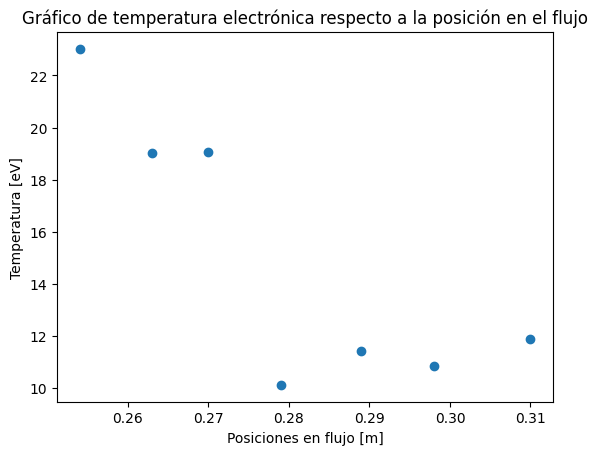

In [10]:
plt.scatter(posiciones, TeV_prom)
plt.xlabel('Posiciones en flujo [m]')
plt.ylabel('Temperatura [eV]')
plt.title('Gráfico de temperatura electrónica respecto a la posición en el flujo')
plt.show()

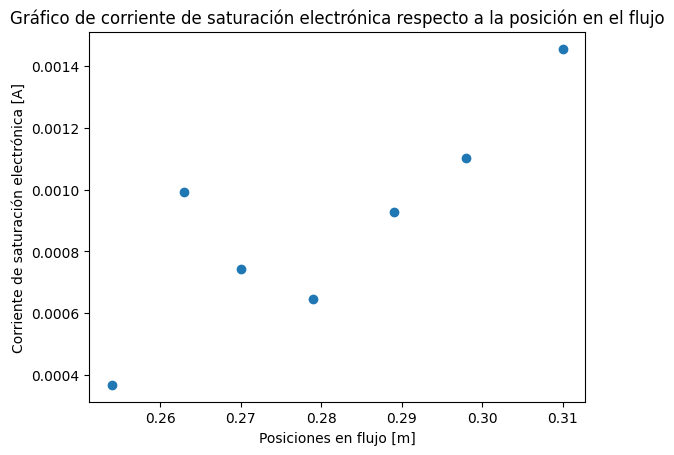

In [11]:
plt.scatter(posiciones, Ies_prom)
plt.xlabel('Posiciones en flujo [m]')
plt.ylabel('Corriente de saturación electrónica [A]')
plt.title('Gráfico de corriente de saturación electrónica respecto a la posición en el flujo')
plt.show()

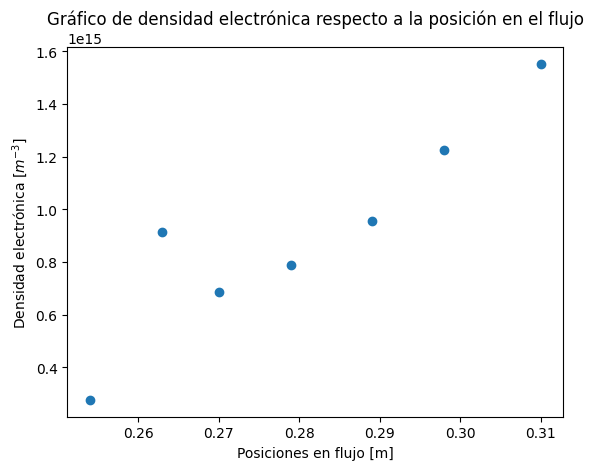

In [12]:
plt.scatter(posiciones, ne_prom)
plt.xlabel('Posiciones en flujo [m]')
plt.ylabel('Densidad electrónica [$m^{-3}$]')
plt.title('Gráfico de densidad electrónica respecto a la posición en el flujo')
plt.show()